In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')

In [4]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [5]:
df_new = df[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]

In [6]:
df_new

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


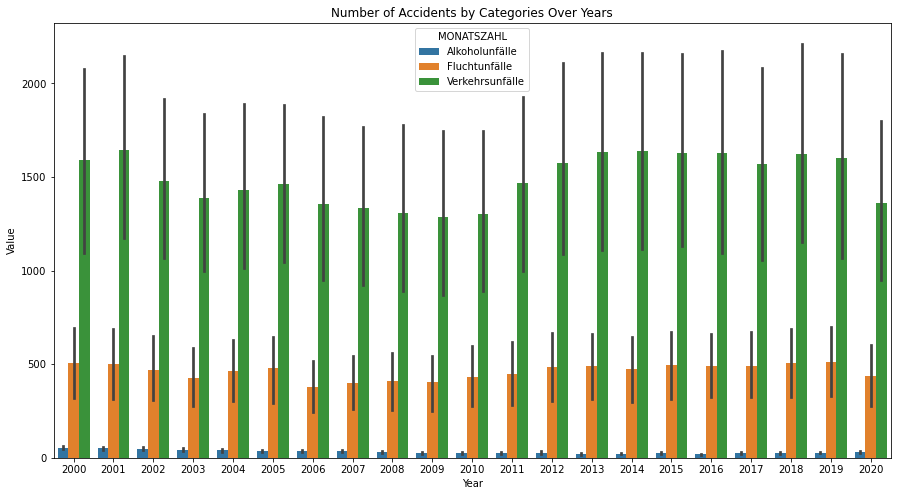

In [7]:
df_new = df_new[df_new['JAHR']<2021]

plt.figure(figsize=(15,8))
sns.barplot(x='JAHR', y='WERT', hue='MONATSZAHL', data = df_new)
plt.title('Number of Accidents by Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [8]:
df_new['date'] = pd.to_datetime(df_new['MONAT'], format='%Y%m')
df_new.set_index('date', inplace=True)

<ipython-input-8-cbb66d718e45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['date'] = pd.to_datetime(df_new['MONAT'], format='%Y%m')


In [9]:
df_sort = df_new.sort_values(by=['date'])
df_sort

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
date,,,,,
2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,200001,34.0
2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,200001,321.0
2000-01-01,Alkoholunfälle,insgesamt,2000,200001,78.0
2000-01-01,Fluchtunfälle,insgesamt,2000,200001,835.0
2000-01-01,Verkehrsunfälle,insgesamt,2000,200001,3448.0
...,...,...,...,...,...
2020-12-01,Fluchtunfälle,Verletzte und Getötete,2020,202012,33.0
2020-12-01,Verkehrsunfälle,Verletzte und Getötete,2020,202012,311.0
2020-12-01,Verkehrsunfälle,insgesamt,2020,202012,2661.0


In [10]:
df_ = df_sort[(df_sort['MONATSZAHL'] == 'Alkoholunfälle')& (df_sort['AUSPRAEGUNG'] == 'insgesamt')]
df_

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
date,,,,,
2000-01-01,Alkoholunfälle,insgesamt,2000,200001,78.0
2000-02-01,Alkoholunfälle,insgesamt,2000,200002,53.0
2000-03-01,Alkoholunfälle,insgesamt,2000,200003,73.0
2000-04-01,Alkoholunfälle,insgesamt,2000,200004,78.0
2000-05-01,Alkoholunfälle,insgesamt,2000,200005,96.0
...,...,...,...,...,...
2020-08-01,Alkoholunfälle,insgesamt,2020,202008,46.0
2020-09-01,Alkoholunfälle,insgesamt,2020,202009,46.0
2020-10-01,Alkoholunfälle,insgesamt,2020,202010,34.0


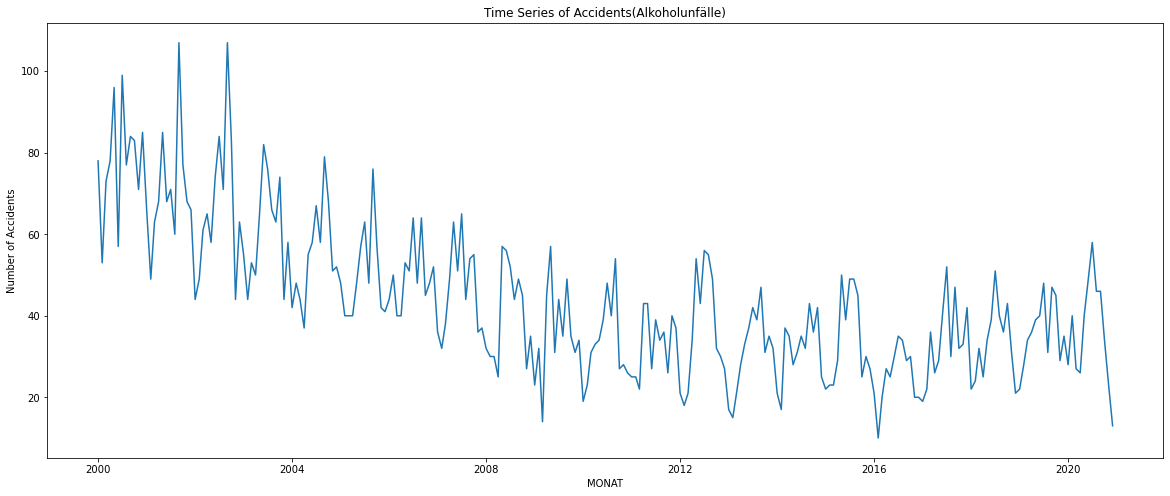

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df_['WERT'])  
plt.title('Time Series of Accidents(Alkoholunfälle)')
plt.xlabel('MONAT')
plt.ylabel('Number of Accidents')
plt.show()

In [12]:
#%pip install prophet
#!conda install -c conda-forge fbprophet -y

In [13]:
#!pip install --upgrade plotly

In [14]:
#pip install --upgrade numpy

11:48:07 - cmdstanpy - INFO - Chain [1] start processing
11:48:07 - cmdstanpy - INFO - Chain [1] done processing


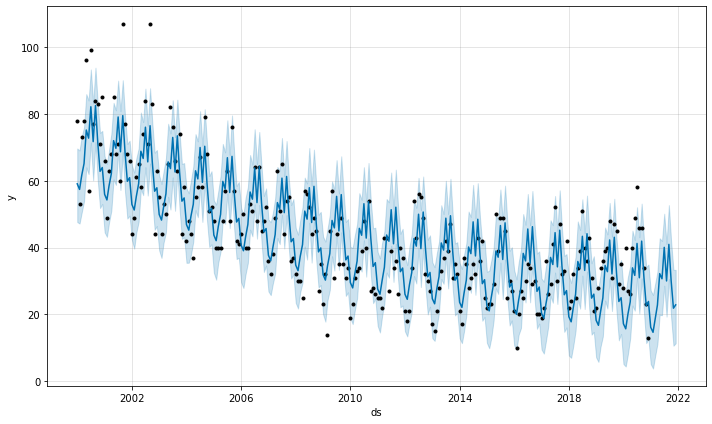

In [36]:
from prophet import Prophet
from prophet.plot import plot_plotly
import optuna

df_prophet = pd.DataFrame({
    'ds': df_.index, 
    'y': df_['WERT']  
})
    
model = Prophet(changepoint_prior_scale=0.01147,  
                    seasonality_prior_scale=14)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=12, freq='M')  

forecast = model.predict(future)

fig1 = model.plot(forecast)

#study = optuna.create_study(direction='minimize')
#study.optimize(pro_model, n_trials=100)    

#best_changepoint_prior_scale = study.best_params['changepoint_prior_scale']
#print('Best changepoint_prior_scale:', best_changepoint_prior_scale)
    

In [37]:
print(forecast['ds'].tail(30))

234   2019-07-01
235   2019-08-01
236   2019-09-01
237   2019-10-01
238   2019-11-01
239   2019-12-01
240   2020-01-01
241   2020-02-01
242   2020-03-01
243   2020-04-01
244   2020-05-01
245   2020-06-01
246   2020-07-01
247   2020-08-01
248   2020-09-01
249   2020-10-01
250   2020-11-01
251   2020-12-01
252   2020-12-31
253   2021-01-31
254   2021-02-28
255   2021-03-31
256   2021-04-30
257   2021-05-31
258   2021-06-30
259   2021-07-31
260   2021-08-31
261   2021-09-30
262   2021-10-31
263   2021-11-30
Name: ds, dtype: datetime64[ns]


In [38]:
prstart_date = '2021-01-01'  
end_date = '2022-12-01'    
future_dates = pd.date_range(start=prstart_date, end=end_date, freq='MS')
future = pd.DataFrame({'ds': future_dates})

forecast = model.predict(future)

specific_forecast = forecast[forecast['ds'] == pd.to_datetime('2021-01-01')]

if not specific_forecast.empty:
    prediction = specific_forecast['yhat'].iloc[0]
    print(f"Prediction for January 1, 2021: {prediction}")
else:
    print("No prediction available for January 1, 2021.")


Prediction for January 1, 2021: 16.03145794138201


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_value = 16

predicted_value = forecast[forecast['ds'] == pd.to_datetime('2021-01-01')]['yhat'].iloc[0]

mae = mean_absolute_error([actual_value], [predicted_value])
mse = mean_squared_error([actual_value], [predicted_value])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.09773511561112258
Mean Squared Error (MSE): 0.009552152823519497
Root Mean Squared Error (RMSE): 0.09773511561112258


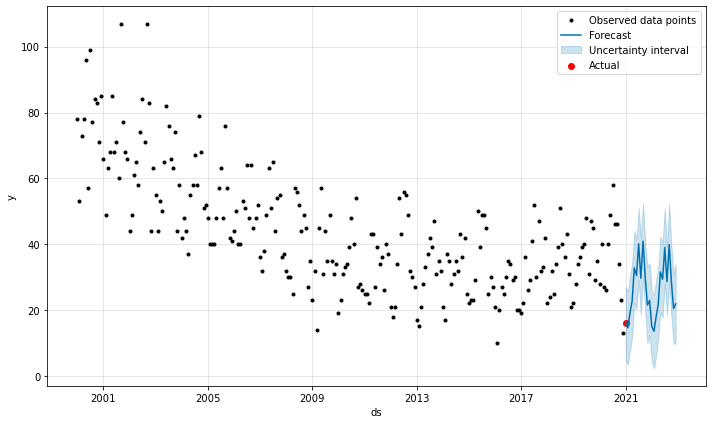

In [29]:
fig = model.plot(forecast)

plt.scatter(x=[pd.to_datetime('2021-01-01')], y=[actual_value], color='red', label='Actual')

plt.legend()
plt.show()